In [1]:
# Imports 
import jeans

import numpy as np
import matplotlib.pyplot as plt

# Profile Inputs

There are four classes of profiles accesible through the 'jeans' package:

1. spherical
2. squashed
3. isothermal
4. cdm 

A summary of their inputs are:

| Model | Required Physics Inputs | Optional Physics Inputs |
|-------|--------|--------|
|   spherical    |    ($r1$, $M200$, $c$)    | (Phi_b) |   
|    squashed   |    ($r1$, $M200$, $c$)     |  (q0, Phi_b)    |  
|    isothermal   |   ($r1$, $M200$, $c$)      |    (q0, Phi_b)       |
|    cdm   |    ($M200$, $c$)     |     (q0, Phi_b)    |

Where the parameters are defined in the following table:

| Parameter | Units | Datatype | Input Type | Default Value | Description |
|-------|--------|--------|--------|--------|--------|
|  $r1$ |  $kpc$ | int/float | Positional (1) | N/A | Matching radius |
| $M200$  | $M_{\odot}$  | int/float  |  Positional (2) | N/A | Virial Mass |
|  $c$ |  N/A | int/float | Positional (3)  |  N/A  | Concentration |
|  halo_type  | N/A | str  |  keyword |  'NFW' | 'NFW' or 'Einasto' outer halo type |
|  gamma | N/A  | int/float  | keyword  | 0.3 | Exponent for Einasto Profile |
| q0  | N/A  | int/float/func(r) |  keyword | 1 | Outer halo shape at rm or shape function |
|  Phi_b | $\frac{km^2}{s^2}$  | func(r, th)  | keyword  |  None | Baryon potential in r and theta |
|  M_b | $M_{\odot}$  | func(r)  | keyword  |  None | Precomputed mass of baryons. Otherwise computed from Phi_b |
|  AC_prescription  | N/A | str  |  **kwarg |  None | 'Cautun' or 'Gnedin' prescription |
|  Gnedin_params  | N/A | tuple (A_0, w)  |  **kwarg |  (1.6, 0.8) | Gnedin parameters |


NOTE: The squashed model subsumes the spherical and cdm models. To generate a spherical model from the squashed model simply set q0=1. Likewise, to generate a cdm model from the squshed model set r1=0.

# Generating Profiles 

## Case 1: Minimal example (no baryons or shape)

In [2]:
rm = 10.0 # kpc
M200 = 1e12 # Msun
c = 10.0 # dimensionless

# spherical jeans profile with NFW out halo 
profile_spherical = jeans.spherical(rm, M200, c)

# squashed profile 
q0 = 0.8
profile_squashed = jeans.squashed(rm, M200, c)

# isothermal profile 
profile_isothermal = jeans.isothermal(rm, M200, c)

# cdm profile
profile_cdm = jeans.cdm(M200, c) # not there is no rm input for cdm profile

compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.004 seconds.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/spherical.py) took 1.572 seconds.
spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/gen.py) took 1.577 seconds.
compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.004 seconds.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/spherical.py) took 1.455 seconds.
compute_log_q_baryon (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.001 seconds.
compute_q_iso (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.335 seconds.
compute_q_eff (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans

Comparing the different profile's spherically averaged densities

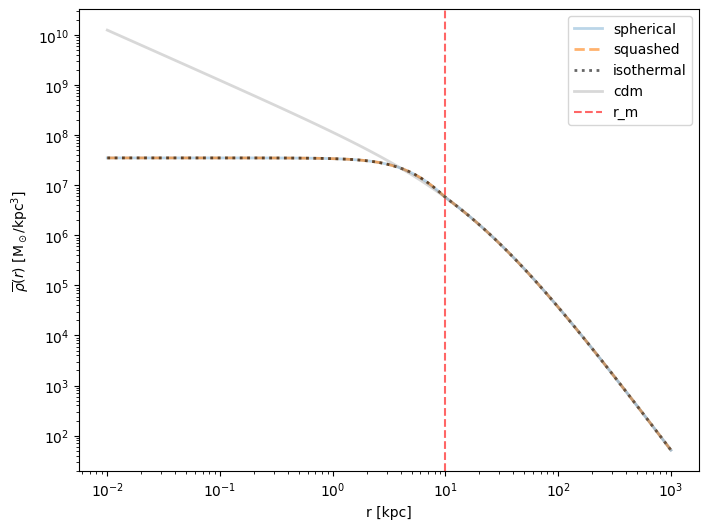

In [3]:
r_list = np.logspace(-2, 3, 100)

plt.figure(figsize=(8,6))
plt.loglog(r_list, profile_spherical.rho_sph_avg(r_list), ls='-', lw=2, alpha=0.3, c='C0',label='spherical')
plt.loglog(r_list, profile_squashed.rho_sph_avg(r_list), ls='--', lw=2, alpha=0.6, c='C1' ,label='squashed')
plt.loglog(r_list, profile_isothermal.rho_sph_avg(r_list), ls=':', lw=2, alpha=0.6,c='k', label='isothermal')
plt.loglog(r_list, profile_cdm.rho_sph_avg(r_list), ls='-', lw=2, alpha=0.3, c='grey', label='cdm')
plt.axvline(rm, ls='--', c='red', alpha=0.6, zorder=0, label='r_m')
plt.xlabel('r [kpc]')
plt.ylabel(r'$\overline{\rho}(r)$ [M$_\odot$/kpc$^3$]')
plt.legend()
plt.show()

## Case 2: Maximal example (baryons, shape, Einasto, AC_prescription)

In [ ]:
rm = 10.0 # kpc
M200 = 1e12 # Msun
R200 = 200.0 # kpc
c = 10.0 # dimensionless
q0 = 0.6 # axis ratio at rm
alpha = 0.2 # power-law index for CDM halo axis ratio
q_func = lambda r: q0 * (r / R200) ** alpha # non-constant outer halo axis ratio
halo_type = "Einasto"
gamma = 0.32
AC_inputs = {'AC_prescription': 'Gnedin', 'Gnedin_params':(1.5, 0.7)}

# Example baryonic potential: Miyamoto-Nagai disk
def Phi_b(r, th):
    GN = 4.302e-6 # gravitational constant in kpc (km/s)^2 Msun^-1
    Md = 6.4e10
    a = 3.5
    b = 0.53
    return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)

# spherical jeans profile with NFW out halo 
profile_spherical = jeans.spherical(rm, M200, c, gamma=gamma, halo_type=halo_type, Phi_b=Phi_b, **AC_inputs)

# squashed profile
profile_squashed = jeans.squashed(rm, M200, c, gamma=gamma, halo_type=halo_type, q0=q_func, Phi_b=Phi_b, **AC_inputs)

# isothermal profile
# profile_isothermal = jeans.isothermal(rm, M200, c, gamma=gamma, halo_type=halo_type, q0=q0, Phi_b=Phi_b, **AC_inputs) # not isothermal profile is not consistent with non-constant q_func

# cdm profile
profile_cdm = jeans.cdm(M200, c, gamma=gamma, halo_type=halo_type, q0=q_func, Phi_b=Phi_b, **AC_inputs) # not there is no rm input for cdm profile

compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.115 seconds.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/spherical.py) took 2.697 seconds.
compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.157 seconds.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/spherical.py) took 2.901 seconds.
compute_log_q_baryon (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.499 seconds.
compute_q_iso (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 46.416 seconds.
compute_q_eff (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 46.416 seconds.
compute_r_sph_grid (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-mo

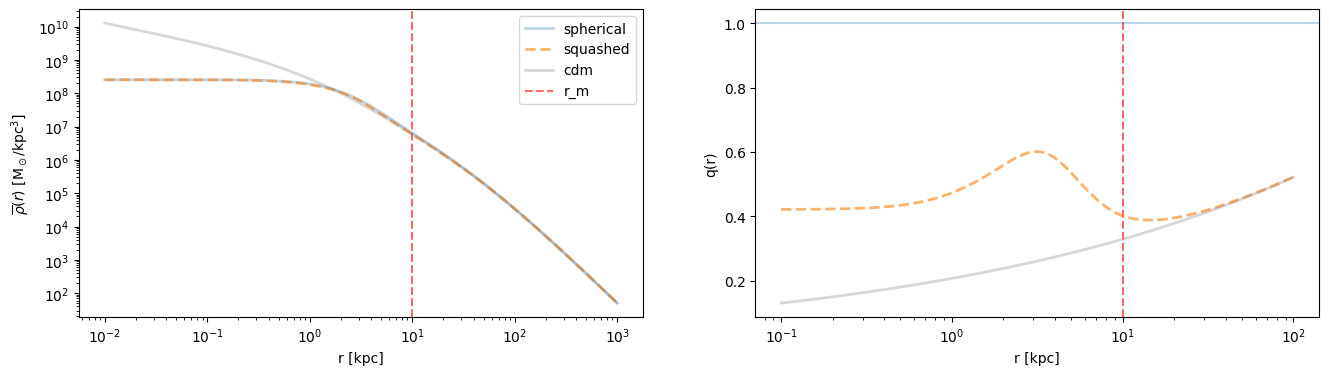

In [5]:
r_list = np.logspace(-2, 3, 100)
r_q = np.geomspace(0.1, 100, 100)

fig, axs = plt.subplots(1, 2,figsize=(16,4))
axs[0].loglog(r_list, profile_spherical.rho_sph_avg(r_list), ls='-', lw=2, alpha=0.3, c='C0',label='spherical')
axs[0].loglog(r_list, profile_squashed.rho_sph_avg(r_list), ls='--', lw=2, alpha=0.6, c='C1' ,label='squashed')
# axs[0].loglog(r_list, profile_isothermal.rho_sph_avg(r_list), ls=':', lw=2, alpha=0.6,c='k', label='isothermal')
axs[0].loglog(r_list, profile_cdm.rho_sph_avg(r_list), ls='-', lw=2, alpha=0.3, c='grey', label='cdm')
axs[0].axvline(rm, ls='--', c='red', alpha=0.6, zorder=0, label='r_m')
axs[0].set_xlabel('r [kpc]')
axs[0].set_ylabel(r'$\overline{\rho}(r)$ [M$_\odot$/kpc$^3$]')
axs[0].legend()

axs[1].axhline(1.0, ls='-', c='C0', alpha=0.3, zorder=0, label='spherical q=1.0')
axs[1].plot(r_q, profile_squashed.q(r_q), ls='--', lw=2, alpha=0.6, c='C1', label='squashed')
# axs[1].plot(r_q, profile_isothermal.q_eff(r_q), ls=':', lw=2, alpha=0.6, c='k', label='isothermal') # q_eff for isothermal
axs[1].plot(r_q, profile_cdm.q_eff(r_q), ls='-', lw=2, alpha=0.3, c='grey', label='cdm') # q_eff for cdm
axs[1].axvline(rm, ls='--', c='red', alpha=0.6, zorder=0, label='q=0.6 at r_m')
axs[1].set_xlabel('r [kpc]')
axs[1].set_ylabel('q(r)')
axs[1].set_xscale('log')
# axs[1].set_ylim(0.6, 1.2)

plt.show()

NOTE: The dark matter halo axis ratio interpolates between the inner isothermal shape in the presence of baryons, the intermediate shape dictated by DM scattering frequency, and the outer CDM halo shape. Hence, the three distinct regimes of the squashed model q(r) profile: an inner prolate plateau, an intermediate increase toward sphericity, and a transition to the CDM shape expectation beyond rm. Note that these inputs are contrived and real halos may not have such dramatic shape features.

# Saving Profiles

The profile class allows for the easy saving of a profile using the .save method. The profile must be saved as a .npz file. 

In [6]:
profile_squashed.save('data/squashed_profile_example.npz')

To load a saved profile use the built-in load method of the jeans class as so, 

In [7]:
saved_profile = jeans.load('data/squashed_profile_example.npz')

Check that they match:

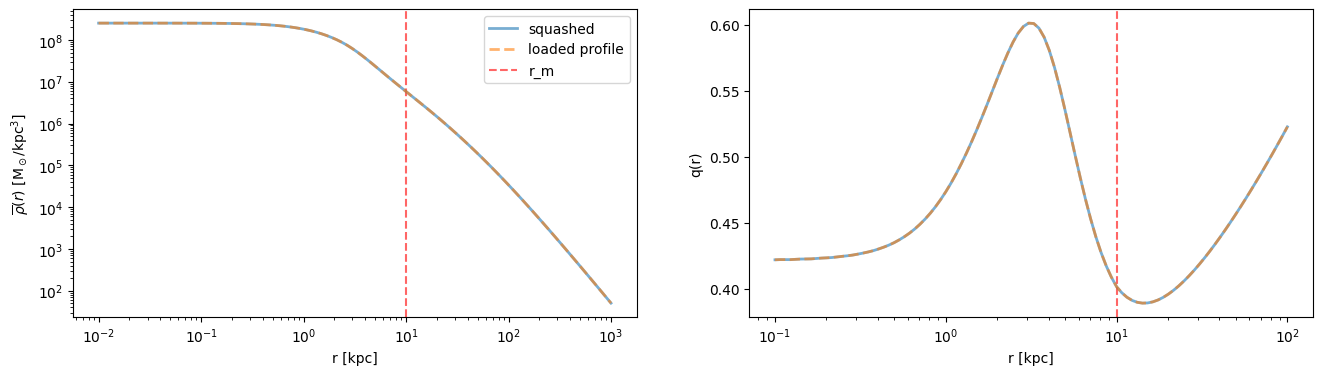

In [8]:
r_list = np.logspace(-2, 3, 100)
r_q = np.geomspace(0.1, 100, 100)

fig, axs = plt.subplots(1, 2,figsize=(16,4))
axs[0].loglog(r_list, profile_squashed.rho_sph_avg(r_list), ls='-', lw=2, alpha=0.6, c='C0' ,label='squashed')
axs[0].loglog(r_list, saved_profile.rho_sph_avg(r_list), ls='--', lw=2, alpha=0.6, c='C1' ,label='loaded profile')
axs[0].axvline(rm, ls='--', c='red', alpha=0.6, zorder=0, label='r_m')
axs[0].set_xlabel('r [kpc]')
axs[0].set_ylabel(r'$\overline{\rho}(r)$ [M$_\odot$/kpc$^3$]')
axs[0].legend()


axs[1].plot(r_q, profile_squashed.q(r_q), ls='-', lw=2, alpha=0.6, c='C0', label='squashed')
axs[1].plot(r_q, saved_profile.q(r_q), ls='--', lw=2, alpha=0.6, c='C1', label='loaded profile')
axs[1].axvline(rm, ls='--', c='red', alpha=0.6, zorder=0, label='q=0.6 at r_m')
axs[1].set_xlabel('r [kpc]')
axs[1].set_ylabel('q(r)')
axs[1].set_xscale('log')
# axs[1].set_ylim(0.6, 1.2)

# Profile Attributes

In [ ]:
profile_squashed

The profile class has 4 main attributes: inner, outer, r1, and q.

- inner: the inner SIDM profile
- outer: the outer CDM profile 
- r1: the matching radius 
- q: the axis ratio function 
    
profile.inner is itself an instantiation of the isothermal_profile class and contains attributes related to the SIDM profile, namely, r0, sigma0, rho0, vrel, Phi_b, and so on. 

profile.outer is an instantiation of the CDM_profile class and contains the outer profile attributes, i.e., M200, c, rhos, rs, r200, q0, halo_type, AC_prescription, and so on. 

Below is an example for profile_squashed:

In [10]:
print(f'The matching radius is {profile_squashed.r1} kpc.')
print(f'r_0 and sigma_0 are {profile_squashed.inner.r0:.2f} kpc and {profile_squashed.inner.sigma0:.2f} km/s, respectively.')
print(f'The relative velocity is {profile_squashed.inner.vrel:.2f} km/s.')
print(f'M200 is {profile_squashed.outer.M200:.2e}.')
print(f'R200 is {profile_squashed.outer.r200:.2f} kpc.')
print(f'Concentration is {profile_squashed.outer.c:.2f}.')
print(f'Scale radius is {profile_squashed.outer.rs:.2f} kpc.')
print(f'Scale density is {profile_squashed.outer.rhos:.2e} Msun/kpc^3.')
print(f'q0 is {profile_squashed.outer.q0:.2f}.')
print(f'The halo type is {profile_squashed.outer.halo_type}.')
print(f'The Einasto gamma is {profile_squashed.outer.gamma:.2f}.')
print(f'The AC prescription is {profile_squashed.outer.AC_prescription}.')

The matching radius is 10.0 kpc.
r_0 and sigma_0 are 1.31 kpc and 153.54 km/s, respectively.
The relative velocity is 346.50 km/s.
M200 is 1.00e+12.
R200 is 206.30 kpc.
Concentration is 10.00.
Scale radius is 20.63 kpc.
Scale density is 2.03e+06 Msun/kpc^3.
q0 is 1.00.
The halo type is Einasto.
The Einasto gamma is 0.32.
The AC prescription is Gnedin.


Which attributes are available will depend on the halo that you have generated. For example, gamma will not exist for an NFW type CDM outer halo. 

## Profile Methods

The functions of which you have use for a profile class can be listed as follows:

In [11]:
import inspect
for name, member in inspect.getmembers(profile_squashed, inspect.ismethod):
    if not name.startswith('_'):
        print(name)

M_encl
Phi
Phi_LM
Phi_dm
V
V_and_q_from_force
V_baryon
Vdm
Vsq
Vsq_LM
Vsq_baryon
Vsq_dm
Vsq_dm_sph_sym
cross_section
q_eff
q_encl
q_shell
r_sph
rho_LM
rho_LM_interp
rho_cyl
rho_cyl_array
rho_sph
rho_sph_avg
rho_spherical
save


For example the cross section can be accessed with the cross_section method,

In [20]:
print(fr'The squashed profile has a cross section: {profile_squashed.cross_section():.2f} cm^2/g')

The squashed profile has a cross section: 0.21 cm^2/g
